# 모듈이용

from import를 이용하여 사용하고자 하는 모듈만 import 합니다.

In [1]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [2]:
import pandas as pd
import numpy as np
import os

## 세부 카테고리 검색

중간가지의 모듈들 정도는 암기하시고 dir 함수를 이용하여 세부 카테고리는 검색해가며 사용하면 좋습니다.

In [3]:
import sklearn.model_selection
dir(sklearn.model_selection)[:5]

['BaseCrossValidator',
 'GridSearchCV',
 'GroupKFold',
 'GroupShuffleSplit',
 'KFold']

## all 을 이용한 탐색

import sklearn 만 진행한후 __all__을 이용해서 하위 모듈들을 확인할 수 있습니다.

In [5]:
import sklearn
sklearn.__all__[-15:-10]

['neural_network',
 'pipeline',
 'preprocessing',
 'random_projection',
 'semi_supervised']

In [6]:
import sklearn.preprocessing
sklearn.preprocessing.__all__

['Binarizer',
 'FunctionTransformer',
 'KBinsDiscretizer',
 'KernelCenterer',
 'LabelBinarizer',
 'LabelEncoder',
 'MultiLabelBinarizer',
 'MinMaxScaler',
 'MaxAbsScaler',
 'QuantileTransformer',
 'Normalizer',
 'OneHotEncoder',
 'OrdinalEncoder',
 'PowerTransformer',
 'RobustScaler',
 'StandardScaler',
 'add_dummy_feature',
 'PolynomialFeatures',
 'binarize',
 'normalize',
 'scale',
 'robust_scale',
 'maxabs_scale',
 'minmax_scale',
 'label_binarize',
 'quantile_transform',
 'power_transform']

# 01 데이터 전처리
## MinMaxScaler

In [8]:
train = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_test.csv')
display(train.head(2))
display(test.head(2))

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,id
0,0,Female,Loyal Customer,54,Personal Travel,Eco,1068,3,4,3,...,5,5,3,5,3,5,3,47,22.0,NaN
1,2,Male,Loyal Customer,20,Personal Travel,Eco,1546,4,4,4,...,4,3,3,4,4,4,4,5,2.0,NaN


,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,id
0,1,Male,Loyal Customer,28,Business travel,Business,3414,2,2,2,...,2,4,5,4,4,4,2,0,0.0,40819.0
1,16,Female,disloyal Customer,34,Business travel,Eco,2556,1,1,1,...,2,5,1,5,1,3,2,15,0.0,33335.0


## Question 1

train 데이터의 Flight Distance 컬럼을 사이킷런 모듈을 이용하여 최솟값을 0 최댓값을 1값로 하는 데이터로 변환하고 scaling을 이름으로 하는 컬럼으로 데이터프레임에 추가하라

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(train['Flight Distance'].values.reshape(-1,1))

scalingdata = sc.transform(train['Flight Distance'].values.reshape(-1,1))
train['scaling'] = scalingdata

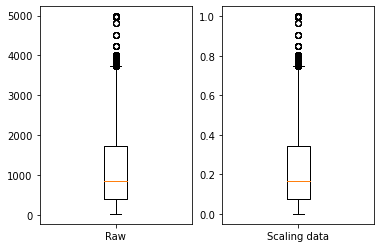

In [17]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,2)
ax[0].boxplot(train['Flight Distance'])
ax[0].set_xticks([1])
ax[0].set_xticklabels(['Raw'])
ax[1].boxplot(scalingdata)
ax[1].set_xticks([1])
ax[1].set_xticklabels(['Scaling data'])
plt.show()

# 분포는 바뀌지 않는다

## Question 2

train 데이터의 Flight Distance 컬럼을 pandas의 내장함수만을 이용하여 최솟값을 0 최댓값을 1값로 하는 데이터로 변환하고 scaling을 이름으로 하는 컬럼으로 데이터프레임에 추가하라

In [20]:
scaling = (train['Flight Distance']-train['Flight Distance'].min()) / (train['Flight Distance'].max() - train['Flight Distance'].min()) 
train['scaling'] = scaling

In [21]:
train['scaling']

0        0.209410
1        0.305937
2        0.591882
3        0.015145
4        0.582795
           ...   
83118    0.144790
83119    0.115105
83120    0.247981
83121    0.161955
83122    0.066842
Name: scaling, Length: 83123, dtype: float64

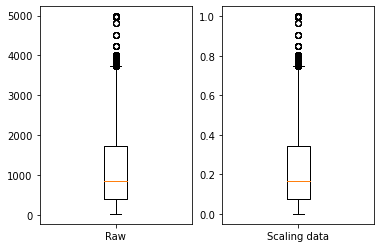

In [23]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,2)
ax[0].boxplot(train['Flight Distance'])
ax[0].set_xticks([1])
ax[0].set_xticklabels(['Raw'])
ax[1].boxplot(train['scaling'])
ax[1].set_xticks([1])
ax[1].set_xticklabels(['Scaling data'])
plt.show()


## Question 3

train 데이터의 Age컬럼을 MinMax 스케일링 진행 하고 age_scaling컬럼에 추가하고 train셋과 같은 기준으로 test데이터의 Age를 스케일링하여 age_scaling에 추가하라

In [24]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(train['Age'].values.reshape(-1,1))
train['age_scaling'] = mm.transform(train['Age'].values.reshape(-1,1))
test['age_scaling'] = mm.transform(test['Age'].values.reshape(-1,1))
display(test[['ID','age_scaling']].head(3))


,ID,age_scaling
0,1,0.269231
1,16,0.346154
2,17,0.205128


## StandardScaler


## Question 4

train 데이터의 Age컬럼을 pandas 기본 내장 모듈을 이용하여 정규화 스케일링을 진행 하고 age_scaling컬럼에 추가하라

In [26]:
scaling = (train['Age'] - train['Age'].mean()) / (train['Age'].std())
train['scaling'] = scaling


KeyError: 'scaling'

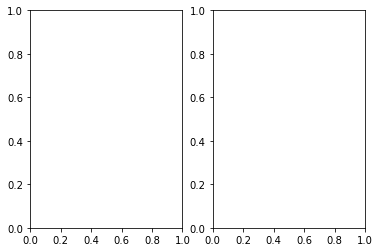

In [3]:
##결과 시각화
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ax[0].boxplot(train['scaling'])
ax[0].set_xticks([1])
ax[0].set_xticklabels(['scaling'])
plt.show()


## Question 5

train 데이터의 Age컬럼을 sklearn 모듈을 이용하여 정규화 스케일링을 진행 하고 age_scaling컬럼에 추가하고 train셋과 같은 기준으로 test데이터의 Age를 스케일링하여 age_scaling에 추가하라

### LabelEnconder


In [5]:
import pandas as pd
x = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/x_train.csv")
y = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/y_train.csv")[['Drug']]
display(x.head(2))
display(y.head(2))

,ID,Age,Sex,BP,Cholesterol,Na_to_K
0,0,36,F,NORMAL,HIGH,16.753
1,1,47,F,LOW,HIGH,11.767


,Drug
0,0
1,3


## OneHotEncoder
multi-columns에 대해서 작업가능한 pandas의 pd.get_dummies가 더 좋음!

## 02 모델링 전처리

### Question 6

x,y데이터에서 train,test세트를 구분하고 train셋의 y값과 test셋의 y값의 unique한 value 값의 숫자를 출력하라. train:test는 7:3비율 , random_state =42로 고정

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state =42,stratify=y)

y.columns = ['Class']
t = pd.concat([y_train.value_counts(),y_test.value_counts()],axis=1).rename(columns={0:'train',1:'test'}).reset_index()
display(t)

# 비율 동일

,Class,train,test
0,0,50,22
1,4,30,13
2,1,13,5
3,2,8,4
4,3,8,4


## 03 모델링
# 모델링의 기본 골격

1. model import

2. model 선언, 초기 하이퍼 파라미터 지정

3. model.fit(x_train,y_train)을 통한 모델 학습

4. 회귀, 분류 문제 모두 model.predict(x_validation) 을 통한 예측

5. auc값을 구해야하는 경우 model.predict_proba(x_validation)을 통한 확률 추출 (svm모델의 경우 학습시 probability=True옵션 추가)

6. 원하는 metric으로 모델 평가 eg) accuracy_score(y_validation, model.predict(x_validation))

### Tip

어떤 모델을 써야할지 잘모르겠다 싶으면 랜덤포레스트쓰면 중간이상은 한다! RandomForestClassifier , RandomForestRegressor